In [17]:
from transformers import pipeline

# Load the emotion detection pipeline
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Example reviews
reviews = [
    "I absolutely love this app! It's so intuitive and helpful.",
    "I'm so frustrated! It crashes every time I try to use it.",
    "This update is okay, but I expected more features.",
    "The customer support team is amazing and very responsive.",
    "I'm disappointed by the recent changes. They made the app worse."
]

# Analyze emotions
for review in reviews:
    emotions = emotion_analyzer(review)
    print(f"Review: {review}")
    print("Emotions:")
    for emotion in emotions[0]:
        print(f"  {emotion['label']}: {emotion['score']:.2f}")
    print()


Review: I absolutely love this app! It's so intuitive and helpful.
Emotions:
  anger: 0.00
  disgust: 0.00
  fear: 0.00
  joy: 0.94
  neutral: 0.03
  sadness: 0.00
  surprise: 0.02

Review: I'm so frustrated! It crashes every time I try to use it.
Emotions:
  anger: 0.95
  disgust: 0.01
  fear: 0.00
  joy: 0.00
  neutral: 0.01
  sadness: 0.02
  surprise: 0.01

Review: This update is okay, but I expected more features.
Emotions:
  anger: 0.01
  disgust: 0.01
  fear: 0.01
  joy: 0.03
  neutral: 0.81
  sadness: 0.07
  surprise: 0.06

Review: The customer support team is amazing and very responsive.
Emotions:
  anger: 0.01
  disgust: 0.01
  fear: 0.01
  joy: 0.08
  neutral: 0.27
  sadness: 0.00
  surprise: 0.63

Review: I'm disappointed by the recent changes. They made the app worse.
Emotions:
  anger: 0.05
  disgust: 0.82
  fear: 0.00
  joy: 0.00
  neutral: 0.03
  sadness: 0.09
  surprise: 0.00



C:\Users\Ryan Jewik\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [1]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np
import string
def string_to_integer(input_str):
    # Remove punctuation from the string
    cleaned_str = input_str.translate(str.maketrans('', '', string.punctuation))
    # Convert the cleaned string to an integer
    try:
        return int(cleaned_str)
    except ValueError:
        raise ValueError("The input string does not contain a valid integer after removing punctuation.")

import re

def clean_filename(filename):
    # Define a regex pattern for characters not allowed in filenames
    invalid_chars = r'[\/:*?"<>|]'
    # Replace invalid characters with an underscore
    cleaned_filename = re.sub(invalid_chars, '_', filename)
    return cleaned_filename

from google_play_scraper import search


#app search
result = search(
    "khan academy kids",
    lang="en",  # defaults to 'en'
    country="us",  # defaults to 'us'
    n_hits=3  # defaults to 30 (= Google's maximum) we can adjust to how many other recommendations we might want
)

appIds = []
appNames = []
appIds.append(result[0]['appId'])
appIds.append(result[1]['appId'])
appIds.append(result[2]['appId'])
appNames.append(result[0]['title'])
appNames.append(result[1]['title'])
appNames.append(result[2]['title'])

#first app
#adds all the reviews to a dataframe
app1_df = pd.DataFrame()
result = reviews_all(
    appIds[0],
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)
for review in result:
    developerResponse = review
    date = review['at']
    userName = review['userName']
    reviewText = review['content']
    score = review['score']
    #can't get title
    #can't get isEdited
    review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                               'score': [score], 'userName': [userName],'name': [appNames[0]]})
    app1_df = pd.concat([app1_df, review_df], ignore_index = True)

#second app
#adds all the reviews to a dataframe
app2_df = pd.DataFrame()
result = reviews_all(
    appIds[1],
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)
for review in result:
    developerResponse = review
    date = review['at']
    userName = review['userName']
    reviewText = review['content']
    score = review['score']
    #can't get title
    #can't get isEdited
    review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                               'score': [score], 'userName': [userName],'name': [appNames[1]]})
    app2_df = pd.concat([app2_df, review_df], ignore_index = True)

#third app
#adds all the reviews to a dataframe
app3_df = pd.DataFrame()
result = reviews_all(
    appIds[2],
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)
for review in result:
    developerResponse = review
    date = review['at']
    userName = review['userName']
    reviewText = review['content']
    score = review['score']
    #can't get title
    #can't get isEdited
    review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                               'score': [score], 'userName': [userName],'name': [appNames[2]]})
    app3_df = pd.concat([app3_df, review_df], ignore_index = True)

C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from transformers import pipeline

# Load the emotion detection pipeline
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)


C:\Users\Ryan Jewik\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [7]:
reviewlist = app1_df['review']
reviewlist

0        I'm using this in place of workbooks for my pr...
1        Amazing!! My grandson will be four in January ...
2        This app has been great for supplementing my k...
3        I've always been wary of my small babies being...
4        Had heard about this app but ended downloading...
                               ...                        
12704                                                  ❤❤❤
12705                                             👌👌👌👌👌👌👌👌
12706                                              Wah....
12707                                                    👎
12708                                                 Um..
Name: review, Length: 12709, dtype: object

In [3]:
# Example reviews
reviews = app1_df['review']
reviews = reviews[:2000]
length = len(reviews)
emotionsdict = {'anger': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'neutral': 0, 'sadness': 0, 'surprise': 0}
emotionsdict['anger']
# Analyze emotions
emotions_df = pd.DataFrame()

In [18]:
reviews

0      I'm using this in place of workbooks for my pr...
1      Amazing!! My grandson will be four in January ...
2      This app has been great for supplementing my k...
3      I've always been wary of my small babies being...
4      Had heard about this app but ended downloading...
                             ...                        
495    اَلسَّلَامُ عَلَيْكُمْ I am unable to sign up....
496    My son loved this app and I was feeling satisf...
497    We have only been using the app for a week, my...
498    My girls age 4 and 5 love this app. I like tha...
499    My son is now 4, and has been using Khan Acade...
Name: review, Length: 500, dtype: object

In [14]:
emotions[0][0]['score']

'anger'

In [4]:
for review in reviews:
    emotions = emotion_analyzer(review)
    for emotion in emotions[0]:
        review_df[emotion['label']] = emotion['score']
    review_df = pd.DataFrame({'review': [review],  'anger': [emotions[0][0]['score']], 'disgust': [emotions[0][1]['score']], 
                               'fear': [emotions[0][2]['score']], 'joy': [emotions[0][3]['score']],'neutral': [emotions[0][4]['score']],
                                'sadness': [emotions[0][5]['score']], 'surprise': [emotions[0][6]['score']]})
    emotions_df = pd.concat([emotions_df, review_df], ignore_index = True)
print(emotions_df['anger'].mean())
print(emotions_df['disgust'].mean())
print(emotions_df['fear'].mean())
print(emotions_df['sadness'].mean())
print(emotions_df['joy'].mean())
print(emotions_df['neutral'].mean())
print(emotions_df['surprise'].mean())

0.01963882991357241
0.01862795234884834
0.009615040066237271
0.058140067298547364
0.5302660766009504
0.23580131679357147
0.12791071534258663


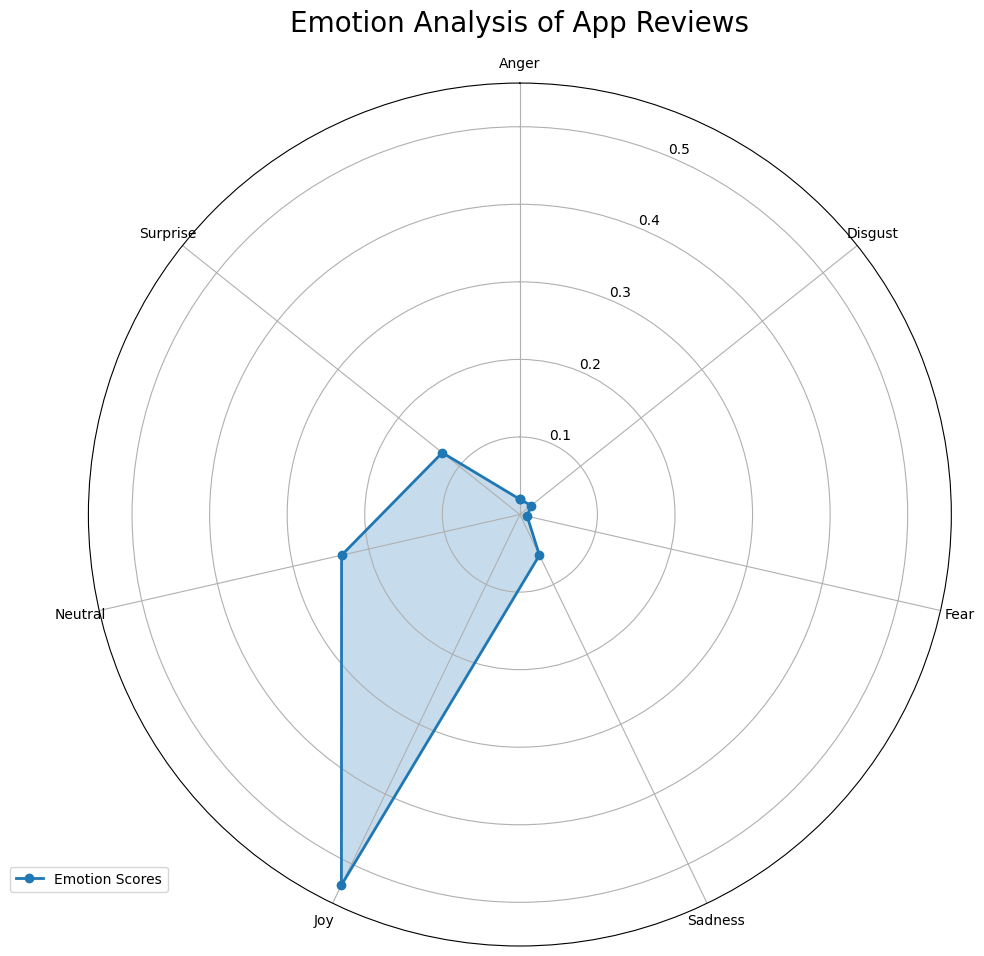

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get the emotion values
emotions = ['Anger', 'Disgust', 'Fear', 'Sadness', 'Joy', 'Neutral', 'Surprise']
values = [
    emotions_df['anger'].mean(),
    emotions_df['disgust'].mean(),
    emotions_df['fear'].mean(),
    emotions_df['sadness'].mean(),
    emotions_df['joy'].mean(),
    emotions_df['neutral'].mean(),
    emotions_df['surprise'].mean()
]

# Number of variables
num_vars = len(emotions)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Normalize values to plot
values += values[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, values, 'o-', linewidth=2, label='Emotion Scores')
ax.fill(angles, values, alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(emotions)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Emotion Analysis of App Reviews", size=20, y=1.05)
plt.tight_layout()
plt.show()

In [6]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

C:\Users\Ryan Jewik\anaconda3\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ryan Jewik\.cache\huggingface\hub\models--SamLowe--roberta-base-go_emotions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'disappointment', 'score': 0.4666951894760132}, {'label': 'sadness', 'score': 0.3984948396682739}, {'label': 'annoyance', 'score': 0.06806597113609314}, {'label': 'neutral', 'score': 0.05703027546405792}, {'label': 'disapproval', 'score': 0.04423929750919342}, {'label': 'nervousness', 'score': 0.014850745908915997}, {'label': 'realization', 'score': 0.014059898443520069}, {'label': 'approval', 'score': 0.011267454363405704}, {'label': 'joy', 'score': 0.006303396541625261}, {'label': 'remorse', 'score': 0.006221492309123278}, {'label': 'caring', 'score': 0.006029403302818537}, {'label': 'embarrassment', 'score': 0.005265483167022467}, {'label': 'anger', 'score': 0.0049814279191195965}, {'label': 'disgust', 'score': 0.004259035456925631}, {'label': 'grief', 'score': 0.0040021371096372604}, {'label': 'confusion', 'score': 0.0033829149324446917}, {'label': 'relief', 'score': 0.0031405005138367414}, {'label': 'desire', 'score': 0.0028274659998714924}, {'label': 'admiration', 'sco

In [16]:
model_outputs = classifier(reviews[2])
print(model_outputs[0])

[{'label': 'admiration', 'score': 0.7376108765602112}, {'label': 'approval', 'score': 0.35689401626586914}, {'label': 'neutral', 'score': 0.17533937096595764}, {'label': 'realization', 'score': 0.028692716732621193}, {'label': 'optimism', 'score': 0.02208348922431469}, {'label': 'disapproval', 'score': 0.010037584230303764}, {'label': 'annoyance', 'score': 0.008559576235711575}, {'label': 'caring', 'score': 0.008040562272071838}, {'label': 'pride', 'score': 0.006348028779029846}, {'label': 'gratitude', 'score': 0.006080633495002985}, {'label': 'disappointment', 'score': 0.005174849648028612}, {'label': 'joy', 'score': 0.004347324371337891}, {'label': 'relief', 'score': 0.0031178852077573538}, {'label': 'excitement', 'score': 0.00291469506919384}, {'label': 'love', 'score': 0.002383628161624074}, {'label': 'confusion', 'score': 0.0023311690893024206}, {'label': 'desire', 'score': 0.002216695575043559}, {'label': 'anger', 'score': 0.001255412120372057}, {'label': 'curiosity', 'score': 0.

In [11]:
model_outputs[0][1]['label']

'sadness'

In [12]:
len(model_outputs[0])

28

In [ ]:
emotions_df = pd.DataFrame()

In [17]:
emotions_df = pd.DataFrame()

for review in reviews:
    # Get emotions for current review
    emotions = classifier(review)
    
    # Create dictionary mapping labels to scores
    row_data = {'review': review}
    for emotion in emotions[0]:
        row_data[emotion['label']] = emotion['score']
        
    # Convert to DataFrame row and concatenate
    review_df = pd.DataFrame([row_data])
    emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)

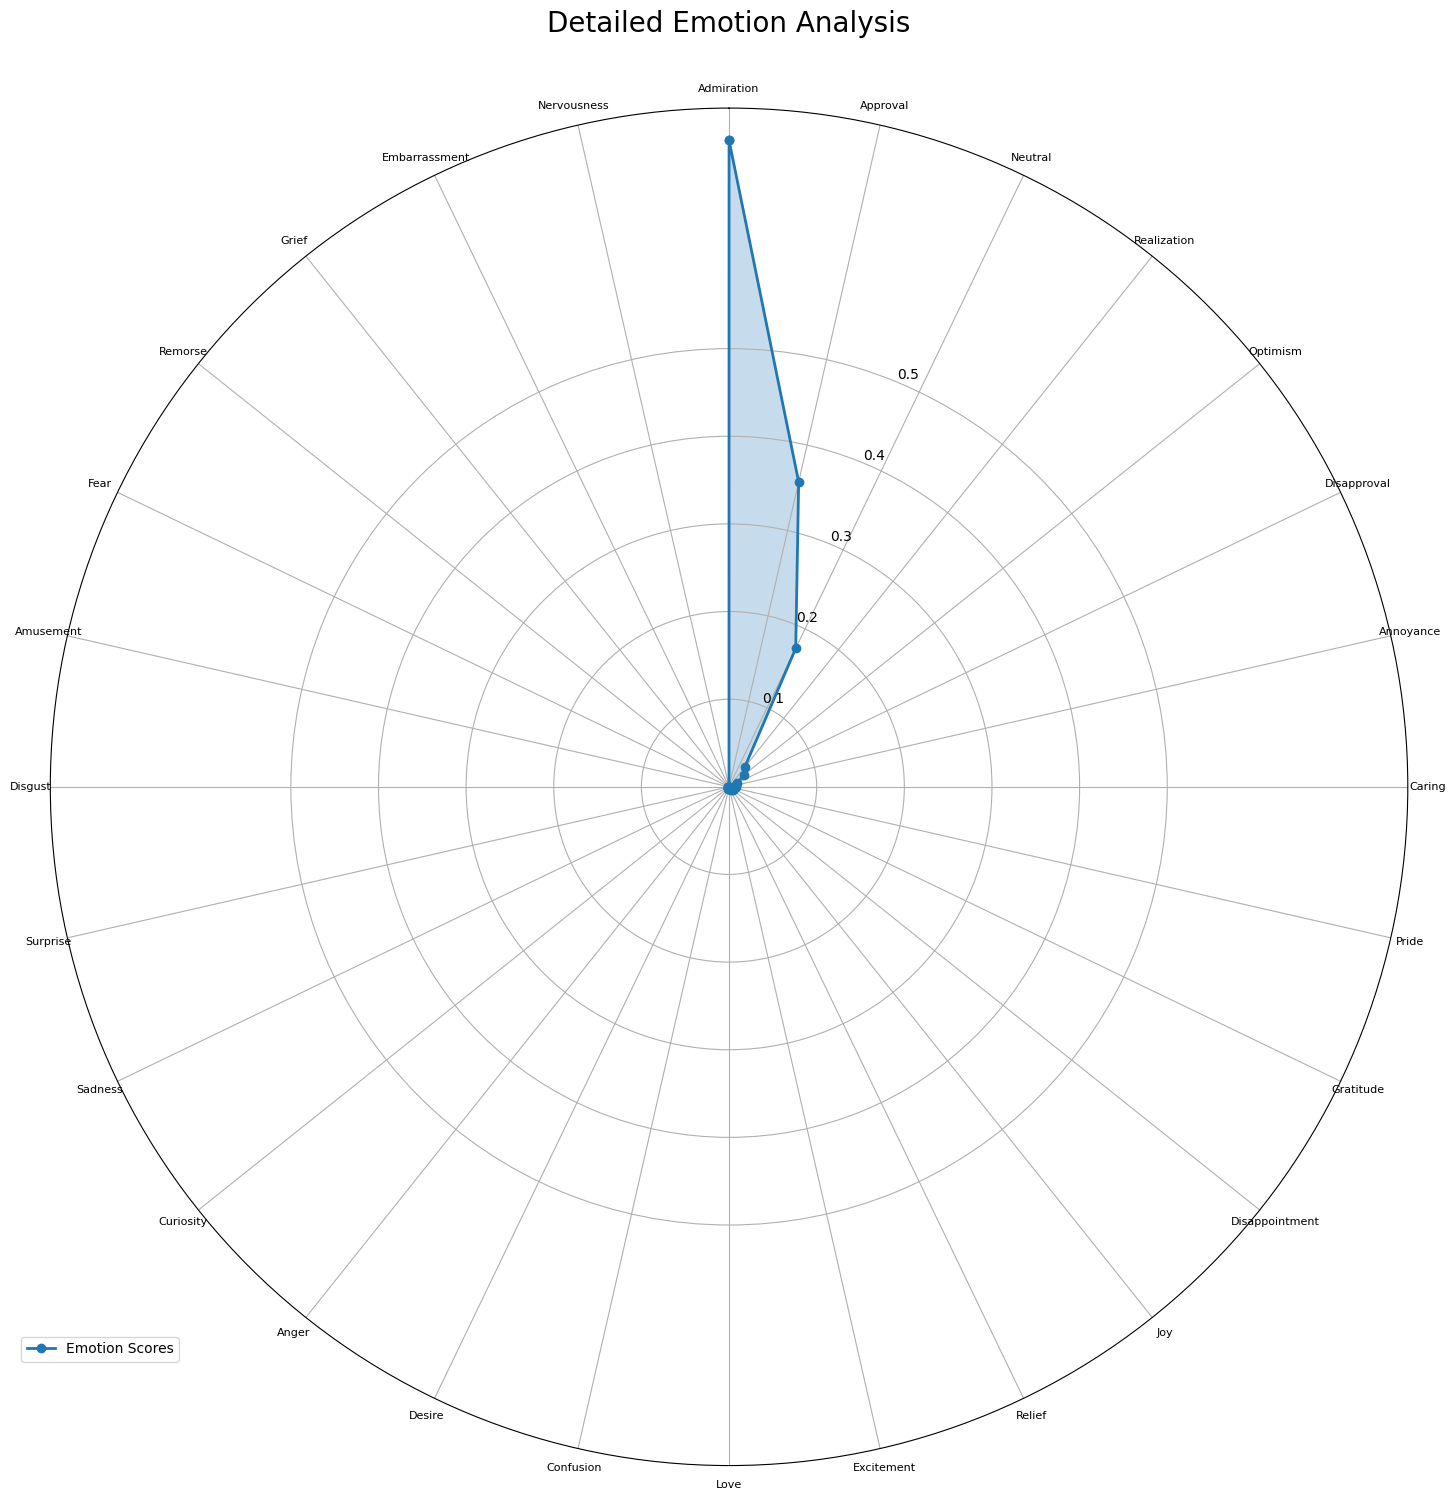

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get the emotion values
emotions = [item['label'].capitalize() for item in model_outputs[0]]
values = [item['score'] for item in model_outputs[0]]

# Number of variables
num_vars = len(emotions)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Normalize values to plot
values += values[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, values, 'o-', linewidth=2, label='Emotion Scores')
ax.fill(angles, values, alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(emotions, size=8)  # Reduced font size for readability

# Add gridlines
ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Detailed Emotion Analysis", size=20, y=1.05)
plt.tight_layout()
plt.show()

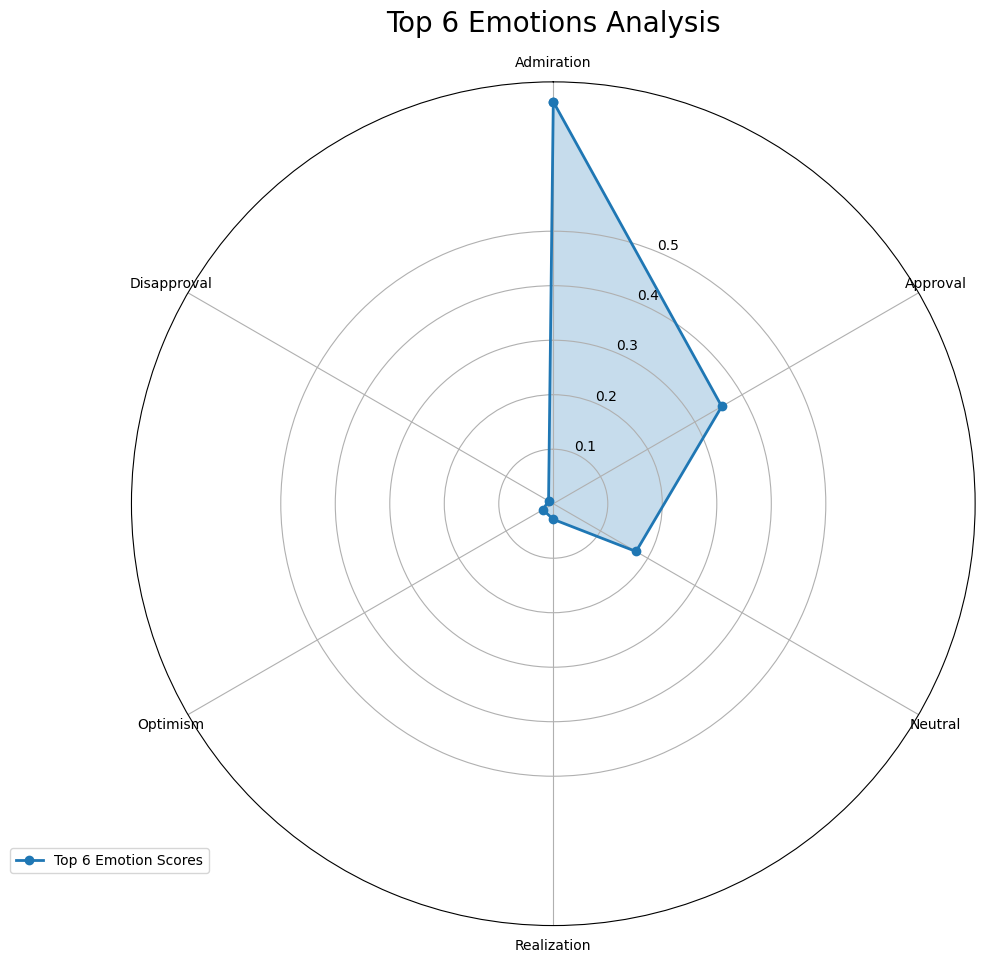

admiration: 0.7376
approval: 0.3569
neutral: 0.1753
realization: 0.0287
optimism: 0.0221
disapproval: 0.0100


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate means for each emotion
emotion_means = {}
for emotion in model_outputs[0]:
    label = emotion['label']
    emotion_means[label] = emotion['score']

# Sort emotions by score and get top 6
top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])

# Prepare data for spider chart
emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
values = list(top_emotions.values())

# Number of variables
num_vars = len(emotions)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Normalize values to plot
values += values[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, values, 'o-', linewidth=2, label='Top 6 Emotion Scores')
ax.fill(angles, values, alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(emotions, size=10)

# Add gridlines
ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Top 6 Emotions Analysis", size=20, y=1.05)
plt.tight_layout()
plt.show()

# Print exact values
for emotion, score in top_emotions.items():
    print(f"{emotion}: {score:.4f}")